In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
import warnings
warnings.filterwarnings('ignore')

In [5]:
df = pd.read_csv("./NFLX.csv")

In [6]:
df.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900
5,2018-02-12,252.139999,259.149994,249.000000,257.950012,257.950012,8534900
6,2018-02-13,257.290009,261.410004,254.699997,258.269989,258.269989,6855200
7,2018-02-14,260.470001,269.880005,260.329987,266.000000,266.000000,10972000
8,2018-02-15,270.029999,280.500000,267.630005,280.269989,280.269989,10759700
9,2018-02-16,278.730011,281.959991,275.690002,278.519989,278.519989,8312400


ANALYSIS OF THE DATASET

In [45]:

netflix_stocks = pd.read_csv('NFLX.csv')

In [46]:
print(netflix_stocks.head())
print(netflix_stocks.info())

         Date        Open        High         Low       Close   Adj Close  \
0  2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1  2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2  2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3  2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4  2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   

     Volume  
0  11896100  
1  12595800  
2   8981500  
3   9306700  
4  16906900  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-nu

In [48]:
netflix_stocks['Date'] = pd.to_datetime(netflix_stocks['Date'])


In [49]:
print("The year represented in the data is:", netflix_stocks['Date'].dt.year.unique())
print("The data is represented by:", netflix_stocks['Date'].dt.dayofweek.unique())


The year represented in the data is: [2018 2019 2020 2021 2022]
The data is represented by: [0 1 2 3 4]


In [50]:
print("The data is represented by:", netflix_stocks['Date'].dt.dayofweek.unique())

The data is represented by: [0 1 2 3 4]


In [51]:
print(netflix_stocks.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


In [52]:
#CORRELATION MATRIX
corr_matrix = netflix_stocks.corr()
print(corr_matrix)

               Date      Open      High       Low     Close  Adj Close  \
Date       1.000000  0.840554  0.841665  0.840878  0.841384   0.841384   
Open       0.840554  1.000000  0.998605  0.998508  0.996812   0.996812   
High       0.841665  0.998605  1.000000  0.998203  0.998551   0.998551   
Low        0.840878  0.998508  0.998203  1.000000  0.998544   0.998544   
Close      0.841384  0.996812  0.998551  0.998544  1.000000   1.000000   
Adj Close  0.841384  0.996812  0.998551  0.998544  1.000000   1.000000   
Volume    -0.427661 -0.415838 -0.400699 -0.432116 -0.413362  -0.413362   

             Volume  
Date      -0.427661  
Open      -0.415838  
High      -0.400699  
Low       -0.432116  
Close     -0.413362  
Adj Close -0.413362  
Volume     1.000000  


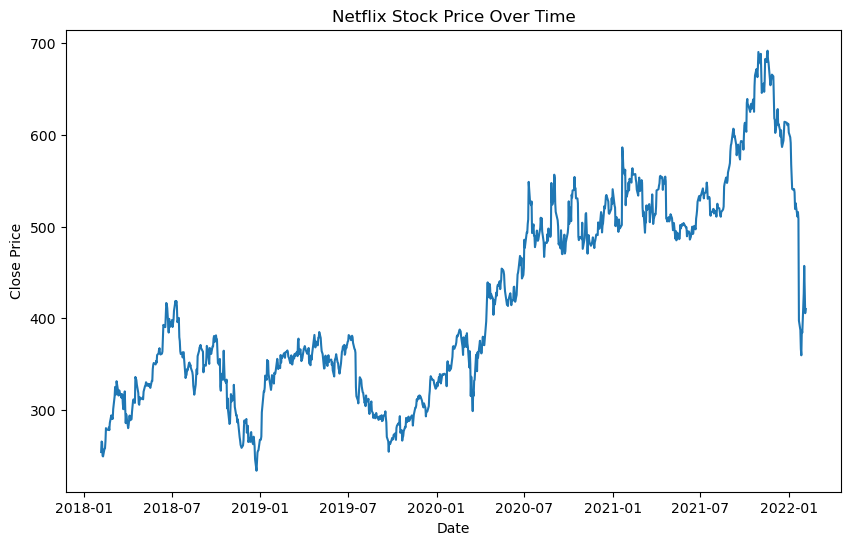

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(netflix_stocks['Date'], netflix_stocks['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Netflix Stock Price Over Time')
plt.show()

            Date        Open        High         Low       Close   Adj Close  \
0     2018-02-05  262.000000  267.899994  250.029999  254.259995  254.259995   
1     2018-02-06  247.699997  266.700012  245.000000  265.720001  265.720001   
2     2018-02-07  266.579987  272.450012  264.329987  264.559998  264.559998   
3     2018-02-08  267.079987  267.619995  250.000000  250.100006  250.100006   
4     2018-02-09  253.850006  255.800003  236.110001  249.470001  249.470001   
...          ...         ...         ...         ...         ...         ...   
1004  2022-01-31  401.970001  427.700012  398.200012  427.140015  427.140015   
1005  2022-02-01  432.959991  458.480011  425.540009  457.130005  457.130005   
1006  2022-02-02  448.250000  451.980011  426.480011  429.480011  429.480011   
1007  2022-02-03  421.440002  429.260010  404.279999  405.600006  405.600006   
1008  2022-02-04  407.309998  412.769989  396.640015  410.170013  410.170013   

        Volume  
0     11896100  
1    

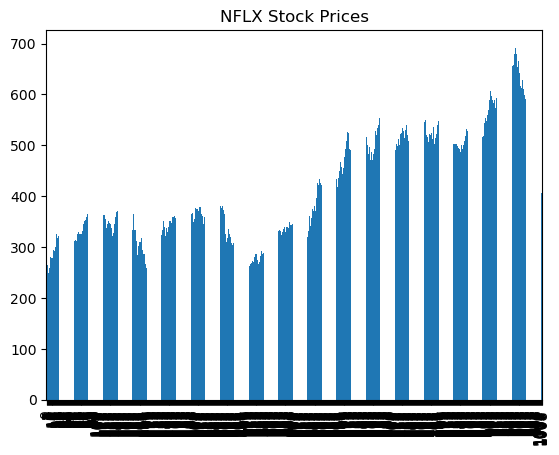

In [7]:
# Display the DataFrame
print(df)

# Create a bar plot of the 'Close' column
df['Close'].plot(kind='bar', title='NFLX Stock Prices')

# Show the plot
plt.show()

In [56]:
netflix_stocks['Date'] = pd.to_datetime(netflix_stocks['Date'])

NO NULL VALUES

In [8]:
print(df.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64


INITIAL VISUALISATION

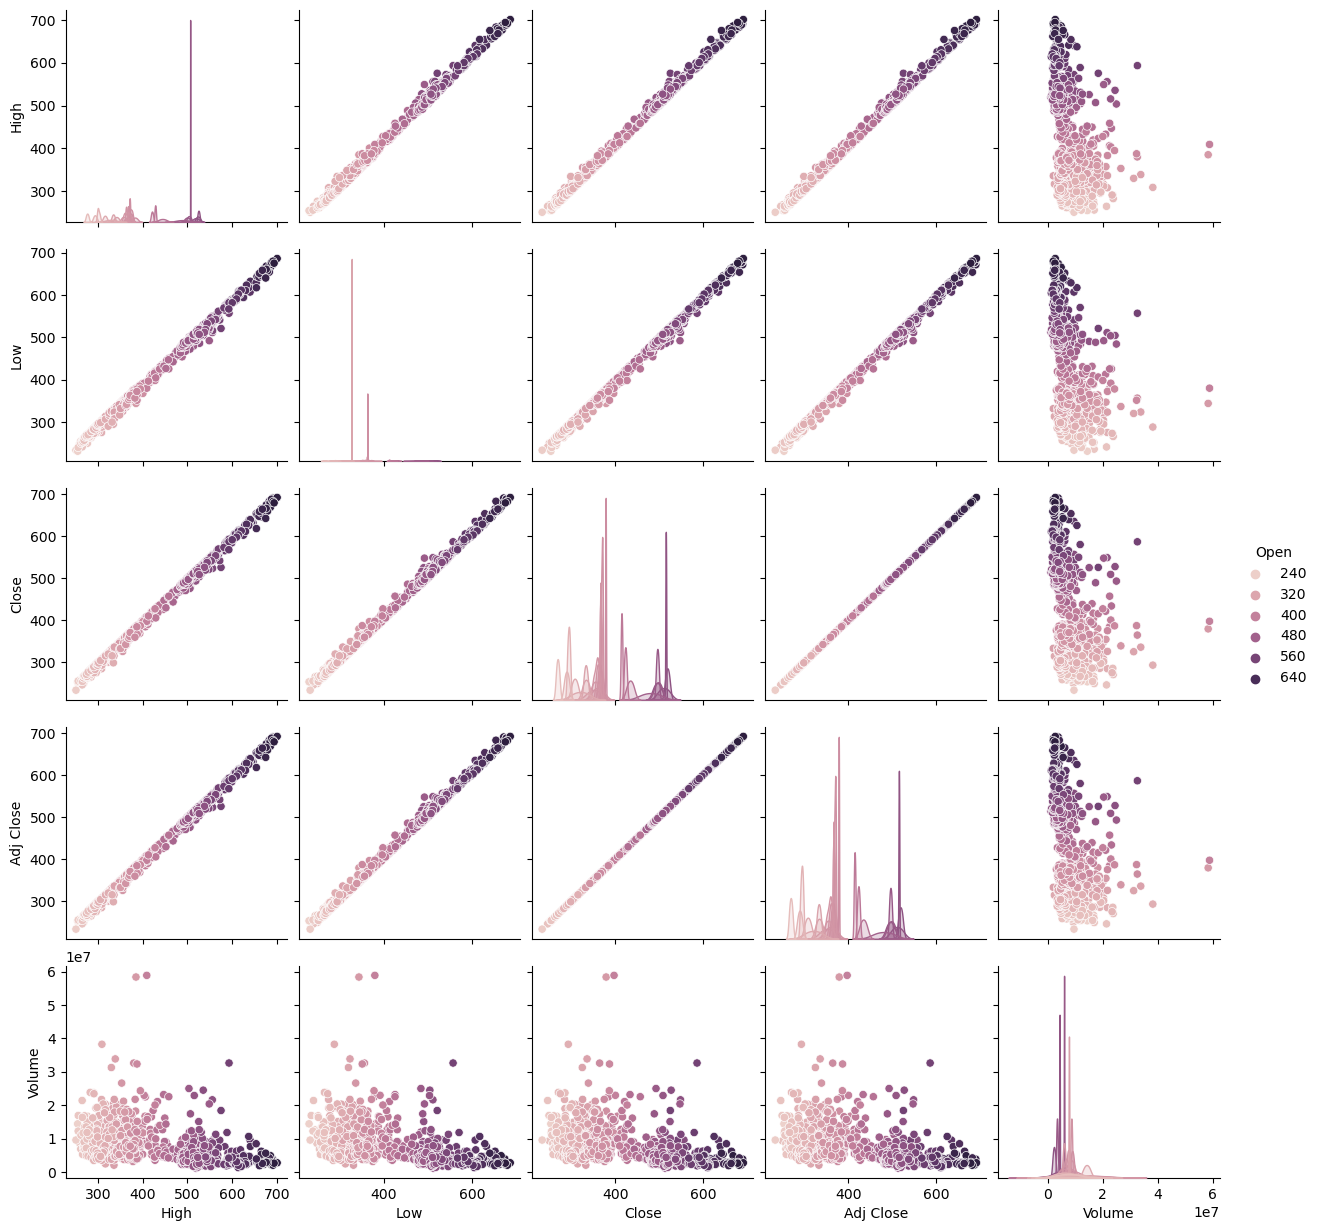

In [9]:
import seaborn as sns
sns.pairplot(df, hue='Open')
plt.show()

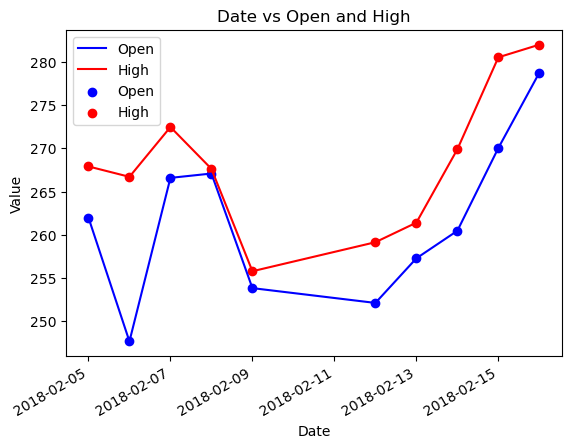

In [10]:

df = pd.DataFrame({
    'date': ['2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-12', '2018-02-13', '2018-02-14', '2018-02-15', '2018-02-16'],
    'open': [262.000000, 247.699997, 266.579987, 267.079987, 253.850006, 252.139999, 257.290009, 260.470001, 270.029999, 278.730011],
    'high': [267.899994, 266.700012, 272.450012, 267.619995, 255.800003, 259.149994, 261.410004, 269.880005, 280.500000, 281.959991]
})
df['date'] = pd.to_datetime(df['date'])
fig, ax = plt.subplots()

ax.plot(df['date'], df['open'], label='Open', color='blue')

# Plot high as a line plot
ax.plot(df['date'], df['high'], label='High', color='red')

# Plot open as a scatter plot
ax.scatter(df['date'], df['open'], label='Open', color='blue', marker='o')

# Plot high as a scatter plot
ax.scatter(df['date'], df['high'], label='High', color='red', marker='o')

# Set plot title and labels
ax.set_title('Date vs Open and High')
ax.set_xlabel('Date')
ax.set_ylabel('Value')
ax.legend()

# Format date on x-axis
ax.xaxis_date()
fig.autofmt_xdate()

# Display the plot
plt.show()

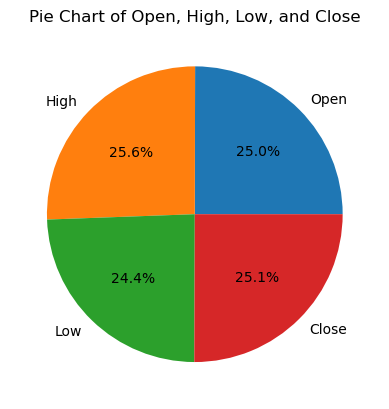

In [11]:
# Assuming you have a DataFrame 'df' with 'open', 'high', 'low', and 'close' columns
df = pd.DataFrame({
    'open': [262.000000, 247.699997, 266.579987, 267.079987, 253.850006, 252.139999, 257.290009, 260.470001, 270.029999, 278.730011],
    'high': [267.899994, 266.700012, 272.450012, 267.619995, 255.800003, 259.149994, 261.410004, 269.880005, 280.500000, 281.959991],
    'low': [250.029999, 245.000000, 264.329987, 250.000000, 236.110001, 249.000000, 254.699997, 260.329987, 267.630005, 275.690002],
    'close': [254.259995, 265.720001, 264.559998, 250.100006, 249.470001, 257.950012, 258.269989, 266.000000, 280.269989, 278.519989]
})
open_sum = df['open'].sum()
high_sum = df['high'].sum()
low_sum = df['low'].sum()
close_sum = df['close'].sum()

# Create a pie chart
plt.pie([open_sum, high_sum, low_sum, close_sum], labels=['Open', 'High', 'Low', 'Close'], autopct='%1.1f%%')

# Set plot title
plt.title('Pie Chart of Open, High, Low, and Close')

# Display the plot
plt.show()

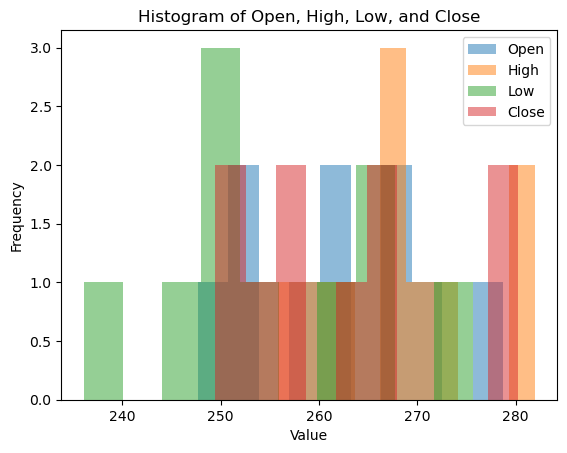

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame 'df' with 'open', 'high', 'low', and 'close' columns
df = pd.DataFrame({
    'open': [262.000000, 247.699997, 266.579987, 267.079987, 253.850006, 252.139999, 257.290009, 260.470001, 270.029999, 278.730011],
    'high': [267.899994, 266.700012, 272.450012, 267.619995, 255.800003, 259.149994, 261.410004, 269.880005, 280.500000, 281.959991],
    'low': [250.029999, 245.000000, 264.329987, 250.000000, 236.110001, 249.000000, 254.699997, 260.329987, 267.630005, 275.690002],
    'close': [254.259995, 265.720001, 264.559998, 250.100006, 249.470001, 257.950012, 258.269989, 266.000000, 280.269989, 278.519989]
})

# Plot histogram for 'open'
plt.hist(df['open'], bins=10, alpha=0.5, label='Open')

# Plot histogram for 'high'
plt.hist(df['high'], bins=10, alpha=0.5, label='High')

# Plot histogram for 'low'
plt.hist(df['low'], bins=10, alpha=0.5, label='Low')

# Plot histogram for 'close'
plt.hist(df['close'], bins=10, alpha=0.5, label='Close')

# Set plot title and labels
plt.title('Histogram of Open, High, Low, and Close')
plt.xlabel('Value')
plt.ylabel('Frequency')

# Add legend
plt.legend()

# Show the plot
plt.show()

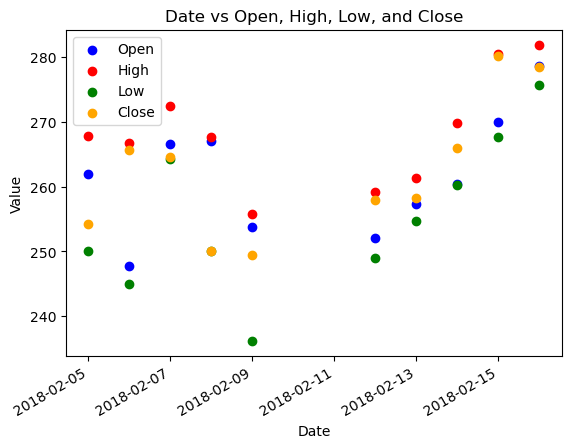

In [12]:


# Assuming you have a DataFrame 'df' with 'date', 'open', 'high', 'low', and 'close' columns
df = pd.DataFrame({
    'date': ['2018-02-05', '2018-02-06', '2018-02-07', '2018-02-08', '2018-02-09', '2018-02-12', '2018-02-13', '2018-02-14', '2018-02-15', '2018-02-16'],
    'open': [262.000000, 247.699997, 266.579987, 267.079987, 253.850006, 252.139999, 257.290009, 260.470001, 270.029999, 278.730011],
    'high': [267.899994, 266.700012, 272.450012, 267.619995, 255.800003, 259.149994, 261.410004, 269.880005, 280.500000, 281.959991],
    'low': [250.029999, 245.000000, 264.329987, 250.000000, 236.110001, 249.000000, 254.699997, 260.329987, 267.630005, 275.690002],
    'close': [254.259995, 265.720001, 264.559998, 250.100006, 249.470001, 257.950012, 258.269989, 266.000000, 280.269989, 278.519989]
})

# Convert 'date' column to datetime
df['date'] = pd.to_datetime(df['date'])

# Create a figure and a set of subplots
fig, ax = plt.subplots()

# Plot 'open' as a scatter plot
ax.scatter(df['date'], df['open'], label='Open', color='blue')

# Plot 'high' as a scatter plot
ax.scatter(df['date'], df['high'], label='High', color='red')

# Plot 'low' as a scatter plot
ax.scatter(df['date'], df['low'], label='Low', color='green')

# Plot 'close' as a scatter plot
ax.scatter(df['date'], df['close'], label='Close', color='orange')

# Set plot title and labels
ax.set_title('Date vs Open, High, Low, and Close')
ax.set_xlabel('Date')
ax.set_ylabel('Value')

# Add legend
ax.legend()

# Format date on x-axis
ax.xaxis_date()
fig.autofmt_xdate()

# Display the plot
plt.show()

In [13]:
viz = df.copy()

In [14]:
df.isnull().sum()

date     0
open     0
high     0
low      0
close    0
dtype: int64

In [15]:
df.shape

(10, 5)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    10 non-null     datetime64[ns]
 1   open    10 non-null     float64       
 2   high    10 non-null     float64       
 3   low     10 non-null     float64       
 4   close   10 non-null     float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 532.0 bytes


In [17]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,10,2018-02-10 12:00:00,2018-02-05 00:00:00,2018-02-07 06:00:00,2018-02-10 12:00:00,2018-02-13 18:00:00,2018-02-16 00:00:00,NaN
open,10.0,261.587,247.699997,254.710007,261.235001,266.954987,278.730011,9.322065
high,10.0,268.337001,255.800003,262.732506,267.759995,271.80751,281.959991,8.470653
low,10.0,255.281998,236.110001,249.25,252.364998,263.329987,275.690002,11.760945
close,10.0,262.511998,249.470001,255.182499,261.414994,265.93,280.269989,10.694271


In [18]:
train, test = train_test_split(df, test_size = 0.2)

In [19]:
test_pred = test.copy()

In [20]:
train.head(10)

,date,open,high,low,close
9,2018-02-16,278.730011,281.959991,275.690002,278.519989
7,2018-02-14,260.470001,269.880005,260.329987,266.000000
2,2018-02-07,266.579987,272.450012,264.329987,264.559998
3,2018-02-08,267.079987,267.619995,250.000000,250.100006
6,2018-02-13,257.290009,261.410004,254.699997,258.269989
8,2018-02-15,270.029999,280.500000,267.630005,280.269989
5,2018-02-12,252.139999,259.149994,249.000000,257.950012
1,2018-02-06,247.699997,266.700012,245.000000,265.720001


In [21]:
test.head(10)

,date,open,high,low,close
0,2018-02-05,262.000000,267.899994,250.029999,254.259995
4,2018-02-09,253.850006,255.800003,236.110001,249.470001


In [24]:
x_train = train[['open', 'high', 'low', 'close']].values
x_test = test[['open', 'high', 'low', 'close']].values

In [26]:
y_train = train['close'].values
y_test = test['close'].values

LINEAR REGRESSION

In [27]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)


LinearRegression()

In [28]:
y_pred = model_lnr.predict(x_test)


In [29]:
result = model_lnr.predict([[262.000000, 267.899994, 250.029999, 11896100]])
print(result)


[11896100.00000001]


EVALUATION OF MODEL

In [30]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))



MSE 0.0
RMSE 0.0
MAE 0.0
MAPE 0.0
R2 Score :  1.0


LOGISTIC REGRESSION

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load the dataset
netflix_stocks = pd.read_csv('NFLX.csv')

# Preprocess the data
X = netflix_stocks[['Open', 'High', 'Low', 'Close', 'Volume']]
y = netflix_stocks['Close'] > netflix_stocks['Open']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [61]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)

print('Accuracy:', accuracy)
print('Confusion Matrix:')
print(confusion)

Accuracy: 0.9900990099009901
Confusion Matrix:
[[104   2]
 [  0  96]]


In [64]:
x_min, x_max = X_test['Open'].min() - 1, X_test['Open'].max() + 1
y_min, y_max = X_test['Close'].min() - 1, X_test['Close'].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
            np.arange(y_min, y_max, 0.1))

Z = model.predict(np.c_[xx.ravel(), yy.ravel(), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel()), np.zeros_like(xx.ravel())])
Z = Z.reshape(xx.shape)

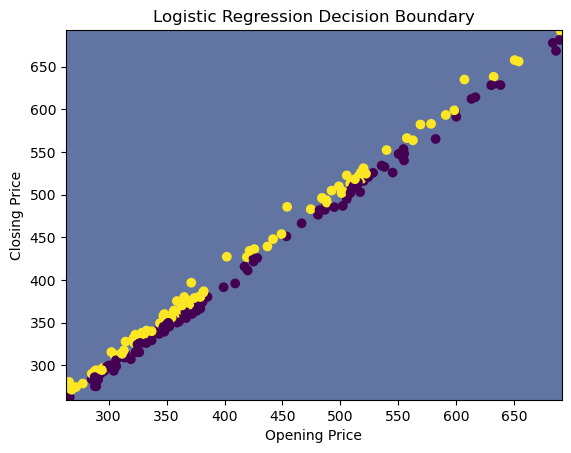

In [65]:
plt.contourf(xx, yy, Z, alpha=0.8, cmap='viridis')
plt.scatter(X_test['Open'], X_test['Close'], c=y_test, cmap='viridis')
plt.xlabel('Opening Price')
plt.ylabel('Closing Price')
plt.title('Logistic Regression Decision Boundary')
plt.show()

SVM MODEL

In [66]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [69]:
df = pd.read_csv('NFLX.csv')

In [88]:
X = df.drop('Open', axis=1)
y = df['Close']
X = X.drop('Date', axis=1)


In [89]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [90]:
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = svm_model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')

ValueError: Unknown label type: continuous. Maybe you are trying to fit a classifier, which expects discrete classes on a regression target with continuous values.

LSTM


In [27]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM

# Load the data
data = pd.read_csv('NFLX.csv')

# Preprocess the data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(data['Close'].values.reshape(-1,1))

# Create training data
train_data_len = int(len(scaled_data) * 0.8)
train_data = scaled_data[0:train_data_len, :]

x_train = []
y_train = []

for i in range(60, train_data_len):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])

x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

# Build the model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

c:\ProgramData\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


747/747 ━━━━━━━━━━━━━━━━━━━━ 17s 16ms/step - loss: 0.0062


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


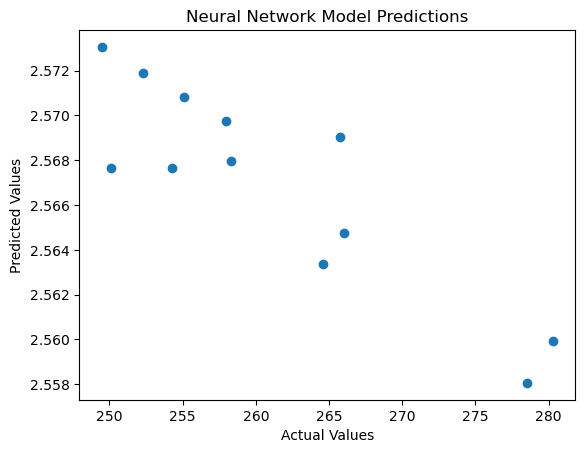

In [31]:
import matplotlib.pyplot as plt

# Make predictions using the model
y_pred = model.predict(df)

# Create a scatter plot of the predicted values against the actual values
plt.scatter(df['Close'], y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Neural Network Model Predictions')
plt.show()

In [36]:
from sklearn.metrics import mean_squared_error, r2_score

# Calculate the mean squared error and the coefficient of determination
mse = mean_squared_error(df['Close'], y_pred)
r2 = r2_score(df['Close'], y_pred)

# Print the results
print('Mean Squared Error:', mse)
print('Coefficient of Determination:', r2)

Mean Squared Error: 66907.82299000624
Coefficient of Determination: -689.7047541306664


Visualisation Of Model

In [36]:
def style():
    plt.figure(facecolor='black', figsize=(15,10))
    ax = plt.axes()

    ax.tick_params(axis='x', colors='white')    
    ax.tick_params(axis='y', colors='white')   
    ax.spines['left'].set_color('white')        
    ax.spines['bottom'].set_color('white')      

    ax.set_facecolor("black")                  

In [37]:
viz['Date']=pd.to_datetime(viz['Date'],format='%Y-%m-%d')

In [38]:
data = pd.DataFrame(viz[['Date','Close']])
data=data.reset_index()
data=data.drop('index',axis=1)
data.set_index('Date', inplace=True)
data = data.asfreq('D')
data


,Close
Date,
2018-02-05,254.259995
2018-02-06,265.720001
2018-02-07,264.559998
2018-02-08,250.100006
2018-02-09,249.470001
...,...
2022-01-31,427.140015
2022-02-01,457.130005
2022-02-02,429.480011


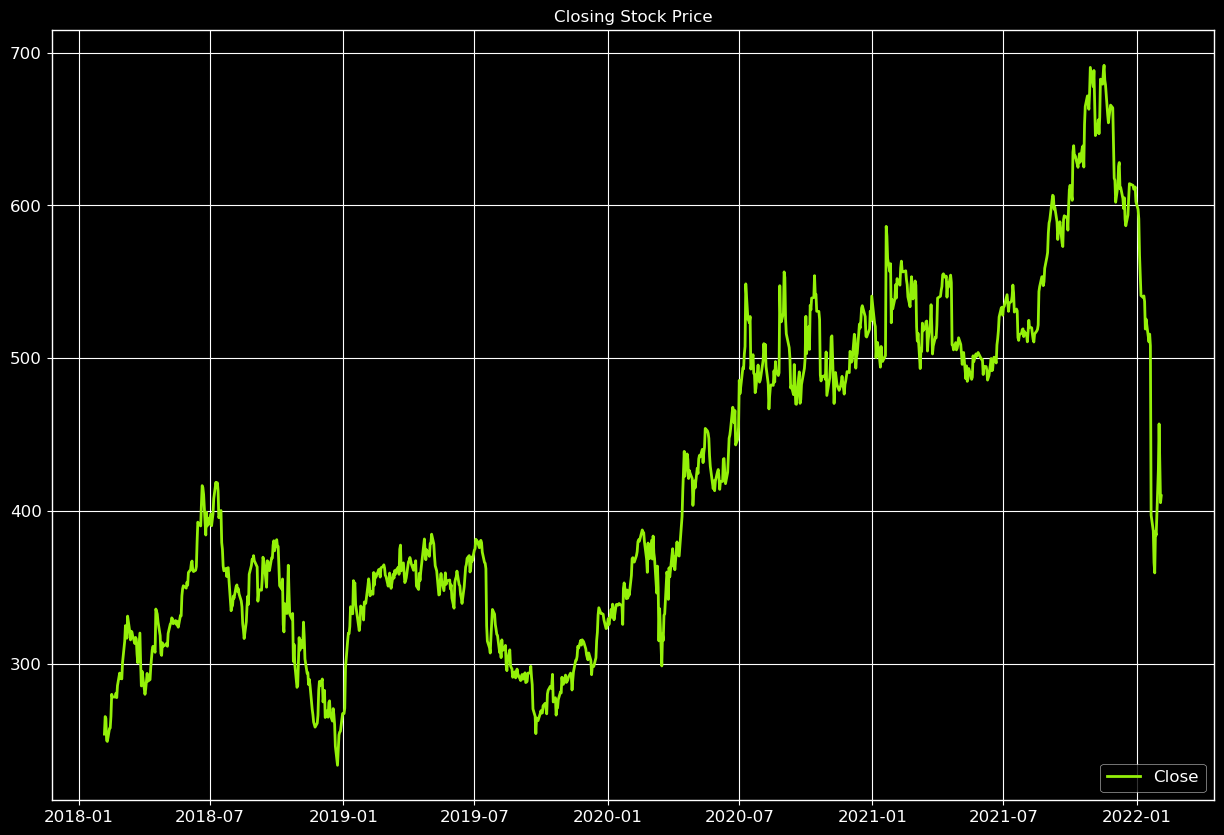

In [40]:
style()

plt.title('Closing Stock Price', color="white")
plt.plot(viz.Date, viz.Close, color="#94F008")
plt.legend(["Close"], loc ="lower right", facecolor='black', labelcolor='white')

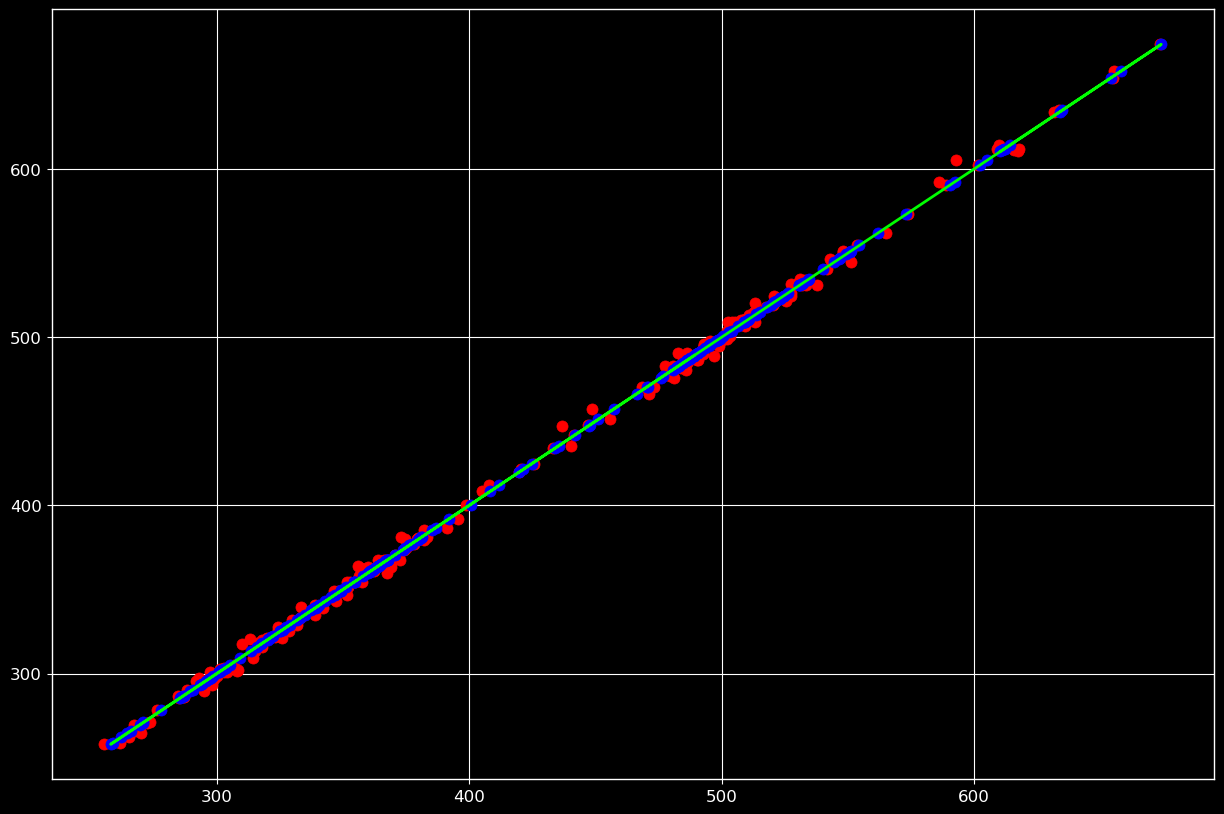

In [41]:
style()

plt.scatter(y_pred, y_test, color='red', marker='o')
plt.scatter(y_test, y_test, color='blue')
plt.plot(y_test, y_test, color='lime')

In [42]:
test_pred['Close_Prediction'] = y_pred
test_pred

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
683,2020-10-21,501.029999,506.850006,488.250000,489.049988,489.049988,17405700,496.729375
195,2018-11-12,300.000000,302.489990,290.630005,294.070007,294.070007,10924800,295.067344
501,2020-02-03,347.239990,359.630005,346.279999,358.000000,358.000000,6670600,356.383813
734,2021-01-05,521.549988,526.780029,515.890015,520.799988,520.799988,3133900,521.187010
86,2018-06-08,358.059998,362.390015,356.250000,360.570007,360.570007,5225700,360.269380
...,...,...,...,...,...,...,...,...
230,2019-01-04,281.880005,297.799988,278.540009,297.570007,297.570007,19330100,293.029616
930,2021-10-14,632.229980,636.880005,626.789978,633.799988,633.799988,2671700,631.698671
845,2021-06-15,501.230011,501.230011,490.399994,491.899994,491.899994,3104100,492.573804
640,2020-08-20,484.690002,498.940002,483.890015,497.899994,497.899994,5132500,495.367383


In [43]:
test_pred[['Close', 'Close_Prediction']].describe().T

,count,mean,std,min,25%,50%,75%,max
Close,202.0,423.600990,102.591375,257.950012,338.810005,396.230011,508.810005,674.049988
Close_Prediction,202.0,423.526749,102.253033,255.496805,338.483334,397.170510,504.814949,673.498879


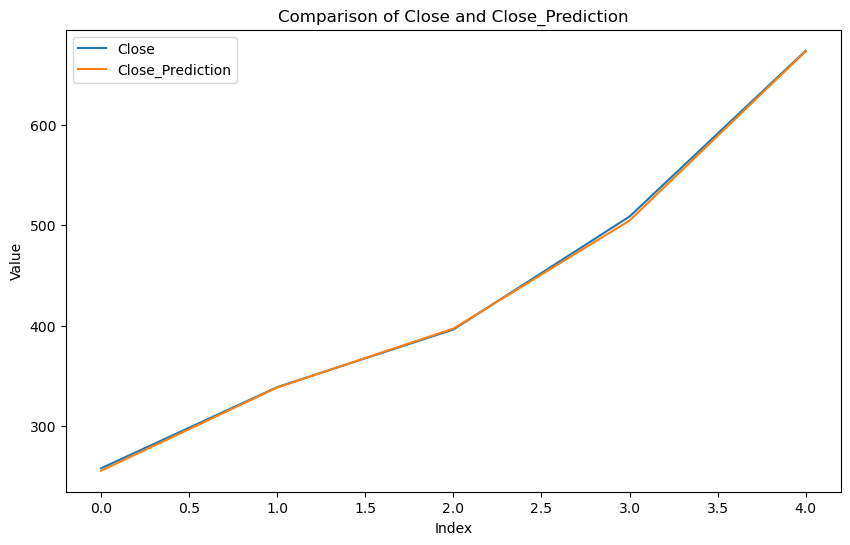

In [16]:
import matplotlib.pyplot as plt

# Assuming Close and Close_Prediction are lists or numpy arrays
Close = [257.950012, 338.810005, 396.230011, 508.810005, 674.049988]
Close_Prediction = [255.496805, 338.483334, 397.170510, 504.814949, 673.498879]

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot Close as a line plot
plt.plot(Close, label='Close')

# Plot Close_Prediction as a line plot
plt.plot(Close_Prediction, label='Close_Prediction')

# Set the plot title and labels
plt.title('Comparison of Close and Close_Prediction')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Display the plot
plt.show()

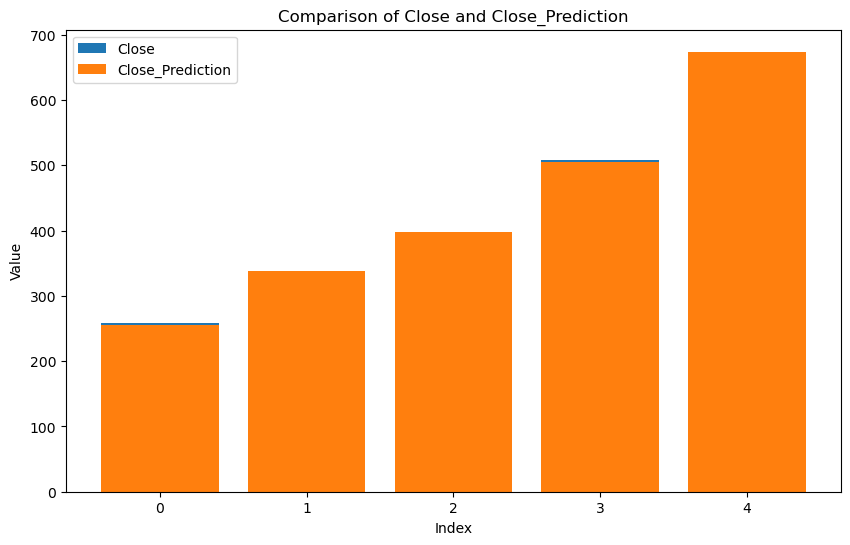

In [17]:
import matplotlib.pyplot as plt

# Assuming Close and Close_Prediction are lists or numpy arrays
Close = [257.950012, 338.810005, 396.230011, 508.810005, 674.049988]
Close_Prediction = [255.496805, 338.483334, 397.170510, 504.814949, 673.498879]

# Create a new figure
plt.figure(figsize=(10, 6))

# Plot Close as a bar plot
plt.bar(range(len(Close)), Close, label='Close')

# Plot Close_Prediction as a bar plot
plt.bar(range(len(Close_Prediction)), Close_Prediction, label='Close_Prediction')

# Set the plot title and labels
plt.title('Comparison of Close and Close_Prediction')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()

# Display the plot
plt.show()

In [19]:
print(df.columns)

Index(['Date', 'Close'], dtype='object')


In [20]:
df['Close_Prediction'] = [255.496805, 338.483334, 397.170510, 504.814949, 673.498879]

In [21]:
# Print the summary statistics
print("Close:")
print("Count: {:.0f}".format(df['Close'].count()))
print("Mean: {:.2f}".format(df['Close'].mean()))
print("Standard Deviation: {:.2f}".format(df['Close'].std()))
print("Min: {:.2f}".format(df['Close'].min()))
print("25%: {:.2f}".format(df['Close'].quantile(0.25)))
print("Median: {:.2f}".format(df['Close'].median()))
print("75%: {:.2f}".format(df['Close'].quantile(0.75)))
print("Max: {:.2f}".format(df['Close'].max()))

print("\nClose_Prediction:")
print("Count: {:.0f}".format(df['Close_Prediction'].count()))
print("Mean: {:.2f}".format(df['Close_Prediction'].mean()))
print("Standard Deviation: {:.2f}".format(df['Close_Prediction'].std()))
print("Min: {:.2f}".format(df['Close_Prediction'].min()))
print("25%: {:.2f}".format(df['Close_Prediction'].quantile(0.25)))
print("Median: {:.2f}".format(df['Close_Prediction'].median()))
print("75%: {:.2f}".format(df['Close_Prediction'].quantile(0.75)))
print("Max: {:.2f}".format(df['Close_Prediction'].max()))

Close:
Count: 5
Mean: 256.82
Standard Deviation: 7.82
Min: 249.47
25%: 250.10
Median: 254.26
75%: 264.56
Max: 265.72

Close_Prediction:
Count: 5
Mean: 433.89
Standard Deviation: 161.80
Min: 255.50
25%: 338.48
Median: 397.17
75%: 504.81
Max: 673.50


In [38]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(512, activation='relu', input_shape=(784,)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10)
])

In [91]:
import pickle

# Assuming that 'model' is the name of your trained model
with open('netflix_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [92]:
with open('netflix_model.pkl', 'rb') as file:
    model = pickle.load(file)